In [10]:
import matplotlib.pyplot as plt
import numpy as np
import shap
import tensorflow as tf

from keras.models import load_model

import datasets

In [11]:
# Check if the GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [12]:
# Load validation dataset
_, validation = datasets.get_datasets()

Found 107394 files belonging to 9 classes.
Using 85916 files for training.
Using 21478 files for validation.


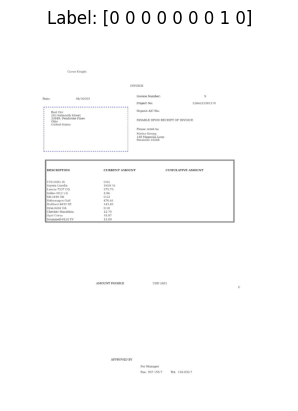

In [13]:
# Plot a sample image

# Assuming 'dataset' is your tf.data.Dataset object created by image_dataset_from_directory
for images, labels in validation.take(1):  # Take one batch from the dataset
    sample_image = images[0]  # Take the first image from the batch
    sample_label = labels[0]  # Take the label of the first image if needed
    
    plt.imsave("sample_image.png", sample_image.numpy())

    # To display the image
    plt.imshow(sample_image.numpy())
    plt.title(f"Label: {sample_label.numpy().astype('uint8')}")
    plt.axis("off")  # Hide the axis
    plt.show()
    break  # Since we only need one sample, we break after the first iteration

In [14]:
sample_image.shape

TensorShape([1122, 846, 3])

In [15]:
# Get background for SHAP
background = []

# Get the first three batches from the dataset
for images, _ in validation.take(1):
    for image in images:
        background.append(image.numpy().astype('uint8'))
        
background = np.array(background)
background.shape

(8, 1122, 846, 3)

In [16]:
def get_images(n):
    images = []
    batches_required = n % 8
    print(batches_required)
    i = 0
    for batch, _ in validation.take(batches_required):
        for image in batch:
            images.append(image.numpy().astype('uint8'))
            i += 1
            if i == n:
                break
    return np.array(images)

In [17]:
# Get test images
test_images = get_images(1)
test_images.shape

1


(1, 1122, 846, 3)

In [18]:
# Load the model
model = load_model('model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 35, 26, 512)       14714688  
                                                                 
 flatten_2 (Flatten)         (None, 465920)            0         
                                                                 
 dense (Dense)               (None, 128)               59637888  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 9)                 1161      
                                                                 
Total params: 74353737 (283.64 MB)
Trainable params: 74353737 (283.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
e = shap.DeepExplainer(model, background)

/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
2024-04-10 15:09:49.628377: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-10 15:09:49.693863: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [20]:
shap_values = e.shap_values(test_images, check_additivity=True)

/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
2024-04-10 15:10:17.584289: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.26GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-10 15:10:17.584345: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.26GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-04-10 1

ResourceExhaustedError: Graph execution error:

Detected at node sequential_2/vgg16/block1_conv2/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_2020453/3451769826.py", line 1, in <module>

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/__init__.py", line 135, in shap_values

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 310, in shap_values

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 366, in run

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 401, in execute_with_overridden_gradients

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 359, in anon

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 244, in grad_graph

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/tobi/PycharmProjects/Validas/SebastianStrobelHauptprojekt/.venv/lib/python3.10/site-packages/keras/src/backend.py", line 5395, in relu

failed to allocate memory
	 [[{{node sequential_2/vgg16/block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_grad_graph_2239]

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, test_images, show=False)
plt.gca().images[-1].colorbar.remove()
axs = plt.gcf().axes

plt.tight_layout()